In [1]:
#Importing required libraries
import pandas as pd
import os
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#Initialization
os.chdir(r"C:\Users\amolr\OneDrive\Projects\Carrier")
InputFile = "2021-01-21_zeta-disease_training-data_dsi-take-home-challenge.csv"
PredFile = "2021-01-21_zeta-disease_prediction-data_dsi-take-home-challenge.csv"

In [3]:
df = pd.read_csv(InputFile)

df.head(5)
#print(df.columns)
#print(df.size)

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


In [4]:
df.columns

Index(['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test',
       'liver_stress_test', 'cardio_stress_test', 'years_smoking',
       'zeta_disease'],
      dtype='object')

<AxesSubplot:>

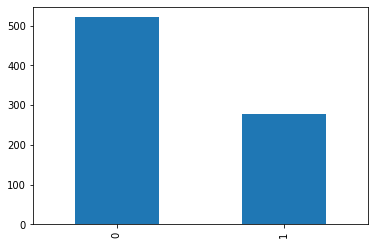

In [5]:
df['zeta_disease'].value_counts().plot(kind="bar")

In [6]:
X = df[['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']]
y = df['zeta_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [8]:
y_pred = lr.predict(X_test)
accuracy = lr.score(X_test,y_test)
print("Model Accuracy:" , accuracy)

Model Accuracy: 0.825


In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[110   6]
 [ 22  22]]


In [10]:
#Load Test Data -- PredFile
pdf = pd.read_csv(PredFile)
pdf.columns

Index(['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test',
       'liver_stress_test', 'cardio_stress_test', 'years_smoking',
       'zeta_disease'],
      dtype='object')

In [11]:
X_validate = pdf[['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']]
y_pred = pd.DataFrame(lr.predict(X_validate),columns=['ZetaDisease'])
Pred_Output = X_validate
Pred_Output['ZetaDiseaseIndicator'] = y_pred['ZetaDisease']
# Output final predicted data to .csv file
Pred_Output.to_csv('LogisticRegress_Output.csv',index=False)



## Normalizing data -- Logistic Regression

In [12]:
from sklearn import preprocessing
X = df[['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']]
y = df['zeta_disease']


X_norm = pd.DataFrame(preprocessing.normalize(X))


X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=0)

In [13]:
X_train

,0,1,2,3,4,5,6,7
172,0.163905,0.785999,0.094990,0.253308,0.491715,0.001448,0.197431,0.037251
76,0.116008,0.725053,0.140039,0.248590,0.580042,0.000625,0.207158,0.008286
64,0.216604,0.830317,0.169158,0.484781,0.000000,0.001691,0.000000,0.005157
765,0.178554,0.743976,0.122862,0.297590,0.518658,0.005130,0.204062,0.017005
52,0.099886,0.846402,0.155086,0.304915,0.231315,0.002591,0.320686,0.015771
...,...,...,...,...,...,...,...,...
763,0.292376,0.721507,0.184857,0.509299,0.000000,0.001734,0.315954,0.023579
192,0.219840,0.858911,0.118100,0.368105,0.000000,0.007867,0.250516,0.040901
629,0.249359,0.777073,0.172232,0.417532,0.000000,0.002086,0.353742,0.069589
559,0.237994,0.729849,0.186693,0.391369,0.285593,0.002331,0.370213,0.063465


In [14]:
lr_norm = LogisticRegression(max_iter=200)
lr_norm.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [15]:
y_pred = lr_norm.predict(X_test)
accuracy = lr_norm.score(X_test,y_test)
print("Model Accuracy:" , accuracy)

Model Accuracy: 0.7


## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [17]:
X = df[['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']]
y = df['zeta_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

In [21]:
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Model Accuracy:", Accuracy)

Model Accuracy: 0.8125


In [22]:
pdf = pd.read_csv(PredFile)
X_validate = pdf[['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']]
y_pred = pd.DataFrame(rfc.predict(X_validate),columns=['ZetaDisease'])

Pred_Output = X_validate
Pred_Output['ZetaDiseaseIndicator'] = y_pred['ZetaDisease']
# Output final predicted data to .csv file
Pred_Output.to_csv('RandomForest_Output.csv',index=False)


1. Both Logistic Regrssion and Random Forest have similar model accuracy. 
2. Normalizing data is not yeilding any better results